In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

In [2]:
results = pd.read_csv('E:\Anas\Machine Learining\ML_projects\FIFA-World-cup-2022-predictions\Data/results.csv')

In [3]:
results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
44147,2022-12-01,Canada,Morocco,NaN,NaN,FIFA World Cup,Doha,Qatar,True
44148,2022-12-02,Serbia,Switzerland,NaN,NaN,FIFA World Cup,Doha,Qatar,True
44149,2022-12-02,Cameroon,Brazil,NaN,NaN,FIFA World Cup,Lusail,Qatar,True
44150,2022-12-02,Ghana,Uruguay,NaN,NaN,FIFA World Cup,Al Wakrah,Qatar,True


In [4]:
#Adding goal difference and establishing who is the winner 
winner = []
for i in range (len(results['home_team'])):
    if results ['home_score'][i] > results['away_score'][i]:
        winner.append(results['home_team'][i])
    elif results['home_score'][i] < results ['away_score'][i]:
        winner.append(results['away_team'][i])
    else:
        winner.append('Draw')
results['winning_team'] = winner

#adding goal difference column
results['goal_difference'] = np.absolute(results['home_score'] - results['away_score'])

results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,Draw,0.0
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,England,2.0
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,Scotland,1.0
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,Draw,0.0
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,Scotland,3.0


In [5]:
#narrowing to team patcipating in the world cup
worldcup_teams = ['Senegal', 'Qatar', 'Netherlands', 'Ecuador', 
            'Iran', 'England', 'USA', 'Wales', 
            'Argentina', 'Saudi Arabia', 'Mexico', 'Poland', 
            'Denmark', 'Tunisia', 'France', 'Australia', 
            'Germany', 'Japan', 'Spain', 'Costa Rica', 
            'Morocco', 'Croatia', 'Belgium', 'Canada', 
            'Switzerland', 'Cameroon', 'Brazil', 'Serbia', 
            'Uruguay', 'South Korea', 'Portugal', 'Ghana']
df_teams_home = results[results['home_team'].isin(worldcup_teams)]
df_teams_away = results[results['away_team'].isin(worldcup_teams)]
df_teams = pd.concat((df_teams_home, df_teams_away))
df_teams.drop_duplicates()
df_teams.count()

date               22145
home_team          22145
away_team          22145
home_score         22052
away_score         22052
tournament         22145
city               22145
country            22145
neutral            22145
winning_team       22145
goal_difference    22052
dtype: int64

In [6]:
df_teams.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,England,2.0
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,Draw,0.0
6,1877-03-03,England,Scotland,1.0,3.0,Friendly,London,England,False,Scotland,2.0
7,1877-03-05,Wales,Scotland,0.0,2.0,Friendly,Wrexham,Wales,False,Scotland,2.0
10,1879-01-18,England,Wales,2.0,1.0,Friendly,London,England,False,England,1.0


In [7]:
#create an year column to drop games before 1930
year = []
for row in df_teams['date']:
    year.append(int(row[:4]))
df_teams['match_year'] = year
df_teams_1930 = df_teams[df_teams.match_year >= 1930]
df_teams_1930.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference,match_year
1263,1930-01-01,Spain,Czechoslovakia,1.0,0.0,Friendly,Barcelona,Spain,False,Spain,1.0,1930
1264,1930-01-12,Portugal,Czechoslovakia,1.0,0.0,Friendly,Lisbon,Portugal,False,Portugal,1.0,1930
1270,1930-02-23,Portugal,France,2.0,0.0,Friendly,Porto,Portugal,False,Portugal,2.0,1930
1271,1930-03-02,Germany,Italy,0.0,2.0,Friendly,Frankfurt am Main,Germany,False,Italy,2.0,1930
1273,1930-03-23,France,Switzerland,3.0,3.0,Friendly,Colombes,France,False,Draw,0.0,1930


In [8]:
#dropping columns that wll not affect matchoutcomes
df_teams_1930 = df_teams.drop(['date', 'home_score', 'away_score', 'tournament', 'city', 'country', 'goal_difference', 'match_year'], axis=1)
df_teams_1930.head()

,home_team,away_team,neutral,winning_team
1,England,Scotland,False,England
3,England,Scotland,False,Draw
6,England,Scotland,False,Scotland
7,Wales,Scotland,False,Scotland
10,England,Wales,False,England


In [9]:
#Building the model
#the prediction label: The winning_team column will show "2" if the home team has won, "1" if it was a tie, and "0" if the away team has won.

df_teams_1930 = df_teams_1930.reset_index(drop=True)
df_teams_1930.loc[df_teams_1930.winning_team == df_teams_1930.home_team,'winning_team']=2
df_teams_1930.loc[df_teams_1930.winning_team == 'Draw', 'winning_team']=1
df_teams_1930.loc[df_teams_1930.winning_team == df_teams_1930.away_team, 'winning_team']=0

df_teams_1930.head()

,home_team,away_team,neutral,winning_team
0,England,Scotland,False,2
1,England,Scotland,False,1
2,England,Scotland,False,0
3,Wales,Scotland,False,0
4,England,Wales,False,2


In [10]:
# Get dummy variables
final = pd.get_dummies(df_teams_1930, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])


In [11]:
from sklearn.model_selection import train_test_split

data = final.copy()
y = data["winning_team"]
y = y.astype('int')
x = data.drop(['winning_team'], axis=1)

# Splitting data
x_train, x_test, y_train, y_test = train_test_split(x, y,
                        test_size=0.30, random_state=44, shuffle =True)

In [12]:
final.head()

,neutral,winning_team,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_Andalusia,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,...,away_team_Venezuela,away_team_Vietnam,away_team_Vietnam Republic,away_team_Wales,away_team_Western Australia,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
0,False,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,False,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,False,2,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [14]:
'''
#linear_model.LogisticRegression(penalty='l2’,dual=False,tol=0.0001,C=1.0,fit_intercept=True,intercept_scaling=1,
#                                class_weight=None,random_state=None,solver='warn’,max_iter=100,
#                                multi_class='warn’, verbose=0,warm_start=False, n_jobs=None)
'''
LogisticRegressionModel = LogisticRegression(penalty='l2',max_iter=100 ,solver='sag',random_state=33) # solver 'liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'
LogisticRegressionModel.fit(x_train, y_train)
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(x_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(x_test, y_test))

LogisticRegressionModel Train Score is :  0.5722211470227727
LogisticRegressionModel Test Score is :  0.5686333534015653


Confusion Matrix is : 
 [[1073   94  757]
 [ 486   92 1016]
 [ 417   96 2613]]


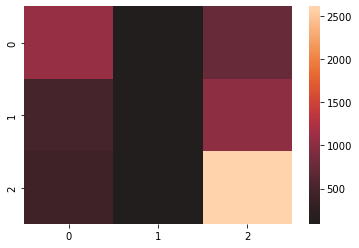

In [15]:
#Calculating Confusion Matrix
y_pred = LogisticRegressionModel.predict(x_test)
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)
# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()

In [16]:
# Loading new datasets
ranking =  pd.read_csv('E:\Anas\Machine Learining\ML_projects\FIFA-World-cup-2022-predictions\Data/rank.csv')
fixtures = pd.read_csv('E:\Anas\Machine Learining\ML_projects\FIFA-World-cup-2022-predictions\Data/matches_2022.csv')
# List for storing the group stage games
pred_set = []

In [17]:
ranking.sort_values(by=['FIFA Ranking'], inplace=True)
ranking.head(32)

,Group,Team,FIFA Ranking
24,G,Brazil,1
20,F,Belgium,2
8,C,Argentina,3
12,D,France,4
4,B,England,5
16,E,Spain,7
3,A,Netherlands,8
28,H,Portugal,9
14,D,Denmark,10
18,E,Germany,11


In [18]:
fixtures.head()

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,Attendance,Venue,Officials,Date,Score,Referee,Notes,Round,Host,Year
0,Qatar,Ecuador,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2022-11-20,NaN,NaN,NaN,NaN,Qatar,2022
1,England,IR Iran,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2022-11-21,NaN,NaN,NaN,NaN,Qatar,2022
2,United States,Wales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2022-11-21,NaN,NaN,NaN,NaN,Qatar,2022
3,Senegal,Netherlands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2022-11-21,NaN,NaN,NaN,NaN,Qatar,2022
4,France,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2022-11-22,NaN,NaN,NaN,NaN,Qatar,2022


In [19]:
# Create new columns with ranking position of each team
fixtures.insert(0, 'first_position', fixtures['home_team'].map(ranking.set_index('Team')['FIFA Ranking']))
fixtures.insert(1, 'second_position', fixtures['away_team'].map(ranking.set_index('Team')['FIFA Ranking']))

# We only need the group stage games, so we have to slice the dataset
fixtures = fixtures.iloc[:48, :]
fixtures.tail()

,first_position,second_position,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,...,Attendance,Venue,Officials,Date,Score,Referee,Notes,Round,Host,Year
43,41.0,22.0,Canada,Morocco,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2022-12-01,NaN,NaN,NaN,NaN,Qatar,2022
44,43.0,1.0,Cameroon,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2022-12-02,NaN,NaN,NaN,NaN,Qatar,2022
45,21.0,15.0,Serbia,Switzerland,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2022-12-02,NaN,NaN,NaN,NaN,Qatar,2022
46,61.0,14.0,Ghana,Uruguay,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2022-12-02,NaN,NaN,NaN,NaN,Qatar,2022
47,NaN,9.0,Korea Republic,Portugal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2022-12-02,NaN,NaN,NaN,NaN,Qatar,2022


In [20]:
# Loop to add teams to new prediction dataset based on the ranking position of each team
for index, row in fixtures.iterrows():
    if row['first_position'] < row['second_position']:
        pred_set.append({'home_team': row['home_team'], 'away_team': row['away_team'], 'winning_team': None})
    else:
        pred_set.append({'home_team': row['away_team'], 'away_team': row['home_team'], 'winning_team': None})
        
pred_set = pd.DataFrame(pred_set)

pred_set.head() 

,home_team,away_team,winning_team
0,Ecuador,Qatar,None
1,IR Iran,England,None
2,United States,Wales,None
3,Netherlands,Senegal,None
4,France,Australia,None


In [21]:
col = pred_set.pop("away_team")
pred_set.insert(0, "away_team", col)
backup_pred_set = pred_set
pred_set.head()

,away_team,home_team,winning_team
0,Qatar,Ecuador,None
1,England,IR Iran,None
2,Wales,United States,None
3,Senegal,Netherlands,None
4,Australia,France,None


In [22]:
# Get dummy variables and drop winning_team column
pred_set = pd.get_dummies(pred_set, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

# Add missing columns compared to the model's training dataset
missing_cols = set(final.columns) - set(pred_set.columns)
for c in missing_cols:
    pred_set[c] = 0
pred_set = pred_set[final.columns]

# Remove winning team column
pred_set = pred_set.drop(['winning_team'], axis=1)

pred_set.head()

C:\Users\user\AppData\Local\Temp/ipykernel_684/3023252425.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0


,neutral,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_Andalusia,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,home_team_Aruba,...,away_team_Venezuela,away_team_Vietnam,away_team_Vietnam Republic,away_team_Wales,away_team_Western Australia,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#group matches 
predictions = LogisticRegressionModel.predict(pred_set)
for i in range(fixtures.shape[0]):
    print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
    if predictions[i] == 2:
        print("Winner: " + backup_pred_set.iloc[i, 1])
    elif predictions[i] == 1:
        print("Draw")
    elif predictions[i] == 0:
        print("Winner: " + backup_pred_set.iloc[i, 0])
    print('Probability of ' + backup_pred_set.iloc[i, 1] + ' winning: ', '%.3f'%(LogisticRegressionModel.predict_proba(pred_set)[i][2]))
    print('Probability of Draw: ', '%.3f'%(LogisticRegressionModel.predict_proba(pred_set)[i][1]))
    print('Probability of ' + backup_pred_set.iloc[i, 0] + ' winning: ', '%.3f'%(LogisticRegressionModel.predict_proba(pred_set)[i][0]))
    print("")

Ecuador and Qatar
Winner: Ecuador
Probability of Ecuador winning:  0.615
Probability of Draw:  0.269
Probability of Qatar winning:  0.116

IR Iran and England
Winner: England
Probability of IR Iran winning:  0.086
Probability of Draw:  0.200
Probability of England winning:  0.713

United States and Wales
Winner: United States
Probability of United States winning:  0.443
Probability of Draw:  0.187
Probability of Wales winning:  0.371

Netherlands and Senegal
Winner: Netherlands
Probability of Netherlands winning:  0.671
Probability of Draw:  0.251
Probability of Senegal winning:  0.078

France and Australia
Winner: France
Probability of France winning:  0.591
Probability of Draw:  0.260
Probability of Australia winning:  0.149

Mexico and Poland
Winner: Mexico
Probability of Mexico winning:  0.486
Probability of Draw:  0.305
Probability of Poland winning:  0.209

Denmark and Tunisia
Winner: Denmark
Probability of Denmark winning:  0.649
Probability of Draw:  0.239
Probability of Tunisi

In [24]:
# List of tuples before 
group_16 = [('Netherlands', 'United States'),
            ('Argentina', 'Denmark'),
            ('France', 'Mexico'),
            ('England', 'Senegal'),
            ('Spain', 'Croatia'),
            ('Brazil', 'Uruguay'),
            ('Belgium', 'Germany'),
            ('Portugal', 'Switzerland')]

In [25]:
def clean_and_predict(matches, ranking, final, logreg):

    # Initialization of auxiliary list for data cleaning
    positions = []

    # Loop to retrieve each team's position according to FIFA ranking
    for match in matches:
        positions.append(ranking.loc[ranking['Team'] == match[0],'FIFA Ranking'].iloc[0])
        positions.append(ranking.loc[ranking['Team'] == match[1],'FIFA Ranking'].iloc[0])
    
    # Creating the DataFrame for prediction
    pred_set = []

    # Initializing iterators for while loop
    i = 0
    j = 0

    # 'i' will be the iterator for the 'positions' list, and 'j' for the list of matches (list of tuples)
    while i < len(positions):
        dict1 = {}

        # If position of first team is better, he will be the 'home' team, and vice-versa
        if positions[i] < positions[i + 1]:
            dict1.update({'home_team': matches[j][0], 'away_team': matches[j][1]})
        else:
            dict1.update({'home_team': matches[j][1], 'away_team': matches[j][0]})

        # Append updated dictionary to the list, that will later be converted into a DataFrame
        pred_set.append(dict1)
        i += 2
        j += 1

    # Convert list into DataFrame
    pred_set = pd.DataFrame(pred_set)
    col = pred_set.pop("away_team")
    pred_set.insert(0, "away_team", col)
    backup_pred_set = pred_set

    # Get dummy variables and drop winning_team column
    pred_set = pd.get_dummies(pred_set, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

    # Add missing columns compared to the model's training dataset
    missing_cols2 = set(final.columns) - set(pred_set.columns)
    for c in missing_cols2:
        pred_set[c] = 0
    pred_set = pred_set[final.columns]
     

    # Remove winning team column
    pred_set = pred_set.drop(['winning_team'], axis=1)

    # Predict!
    predictions = LogisticRegressionModel.predict(pred_set)
    for i in range(len(pred_set)):
        print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
        if predictions[i] == 2:
            print("Winner: " + backup_pred_set.iloc[i, 1])
        elif predictions[i] == 1:
            print("Draw")
        elif predictions[i] == 0:
            print("Winner: " + backup_pred_set.iloc[i, 0])
        print('Probability of ' + backup_pred_set.iloc[i, 1] + ' winning: ' , '%.3f'%(LogisticRegressionModel.predict_proba(pred_set)[i][2]))
        print('Probability of Draw: ', '%.3f'%(LogisticRegressionModel.predict_proba(pred_set)[i][1])) 
        print('Probability of ' + backup_pred_set.iloc[i, 0] + ' winning: ', '%.3f'%(LogisticRegressionModel.predict_proba(pred_set)[i][0]))
        print("")

In [26]:
clean_and_predict(group_16, ranking, final, LogisticRegressionModel)

Netherlands and United States
Winner: Netherlands
Probability of Netherlands winning:  0.804
Probability of Draw:  0.134
Probability of United States winning:  0.062

Argentina and Denmark
Winner: Argentina
Probability of Argentina winning:  0.742
Probability of Draw:  0.168
Probability of Denmark winning:  0.090

France and Mexico
Winner: France
Probability of France winning:  0.604
Probability of Draw:  0.219
Probability of Mexico winning:  0.177

England and Senegal
Winner: England
Probability of England winning:  0.723
Probability of Draw:  0.204
Probability of Senegal winning:  0.074

Spain and Croatia
Winner: Spain
Probability of Spain winning:  0.580
Probability of Draw:  0.244
Probability of Croatia winning:  0.175

Brazil and Uruguay
Winner: Brazil
Probability of Brazil winning:  0.722
Probability of Draw:  0.172
Probability of Uruguay winning:  0.105

Belgium and Germany
Winner: Germany
Probability of Belgium winning:  0.343
Probability of Draw:  0.171
Probability of Germany 

C:\Users\user\AppData\Local\Temp/ipykernel_684/2764023402.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0


In [27]:
# List of matches
quarters = [('Netherlands', 'Argentina'),
            ('France', 'England'),
            ('Spain', 'Brazil'),
            ('Germany', 'Portugal')]

In [28]:
clean_and_predict(quarters, ranking, final, LogisticRegressionModel)

Argentina and Netherlands
Winner: Argentina
Probability of Argentina winning:  0.585
Probability of Draw:  0.258
Probability of Netherlands winning:  0.157

France and England
Winner: England
Probability of France winning:  0.310
Probability of Draw:  0.294
Probability of England winning:  0.396

Brazil and Spain
Winner: Brazil
Probability of Brazil winning:  0.613
Probability of Draw:  0.230
Probability of Spain winning:  0.157

Portugal and Germany
Winner: Portugal
Probability of Portugal winning:  0.390
Probability of Draw:  0.273
Probability of Germany winning:  0.338



C:\Users\user\AppData\Local\Temp/ipykernel_684/2764023402.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0


In [29]:
# List of matches
semi = [('Argentina', 'Brazil'),
        ('England', 'Portugal')]

In [30]:
clean_and_predict(semi, ranking, final, LogisticRegressionModel)

Brazil and Argentina
Winner: Brazil
Probability of Brazil winning:  0.625
Probability of Draw:  0.225
Probability of Argentina winning:  0.150

England and Portugal
Winner: England
Probability of England winning:  0.591
Probability of Draw:  0.227
Probability of Portugal winning:  0.182



C:\Users\user\AppData\Local\Temp/ipykernel_684/2764023402.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0


In [31]:
# 3 , 4
match_3_4 = [('Argentina', 'Portugal')]

In [32]:
clean_and_predict(match_3_4, ranking, final, LogisticRegressionModel)

C:\Users\user\AppData\Local\Temp/ipykernel_684/2764023402.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0


Argentina and Portugal
Winner: Argentina
Probability of Argentina winning:  0.688
Probability of Draw:  0.203
Probability of Portugal winning:  0.109



In [33]:
# Finals
finals = [('Brazil', 'England')]

In [34]:
clean_and_predict(finals, ranking, final, LogisticRegressionModel)

C:\Users\user\AppData\Local\Temp/ipykernel_684/2764023402.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0


Brazil and England
Winner: Brazil
Probability of Brazil winning:  0.534
Probability of Draw:  0.281
Probability of England winning:  0.185



## first place : Brazil

## Second place : England

## Third place : Argentina

## fourth place : Portugal

 # fifa world cup 2022 champion : Brazil